In [3]:
#loading the dataset 
#Importing pandas library 
import pandas as pd 
import numpy as np

#Reading the dataset 
mydata=pd.read_csv('Football teams.csv')
mydata.describe()

#Input and output features 
#Input features 


X = mydata.drop(['Rating' , 'Team' , 'Tournament'] , axis=1)

#Output features 

y = mydata.drop(['Goals' , 'Shots pg' , 'yellow_cards' , 'red_cards' , 'Possession%' , 'Pass%' , 'AerialsWon' , 'Team' , 'Tournament' ] , axis=1)


#Splitting the dataset into training and testing datset 
#Importing train_test_split function 

from sklearn.model_selection import train_test_split

#Splitting the dataset 

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.21 , random_state=20)


In [4]:
#SVM
from sklearn.svm import SVR

#Creating and fitting the SVR model


LL_svr = SVR().fit(X_train,y_train)

#Print the r_sq

print(LL_svr.score(X_train , y_train))

0.8104243940845366


C:\Users\ashok\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
#Training model evaluation 
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score , explained_variance_score
#Predicting on the training data 
ytrain_pred = LL_svr.predict(X_train)



#The r_sq value 
print(r2_score(y_train , ytrain_pred))

0.8104243940845366


In [6]:
#The mae 

print(mean_absolute_error(y_train , ytrain_pred))

0.04417532088233932


In [7]:
#The mse 

print(mean_squared_error(y_train , ytrain_pred))

0.00301471576135993


In [8]:
#The rmse 


print(np.sqrt(mean_squared_error(y_train , ytrain_pred)))

0.054906427322854744


In [9]:
#The EVS 

print(explained_variance_score(y_train , ytrain_pred))

0.8280105267142648


In [10]:
#Prediction on the testing dataset 

ytest_pred = LL_svr.predict(X_test)

print(ytest_pred[:10])

[6.54959262 6.55660821 6.87744285 6.59633517 6.50448944 6.7252863
 6.82390315 6.56702654 6.88121811 6.63314353]


In [11]:
#Thon e coeff of determination

print(r2_score(y_test , ytest_pred))

0.8196603417866126


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


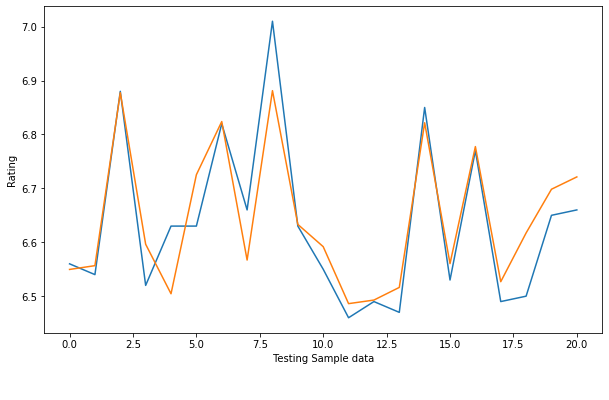

In [14]:
#Plotting the observed and predicted data
import matplotlib.pyplot as plt 
#Setting the boundaries and parameters
plt.rcParams['figure.figsize']=(10,6)
x_ax = range(len(X_test))
#Plotting 
plt.plot(x_ax , y_test.values.ravel())
plt.plot(x_ax , ytest_pred)
plt.ylabel("Rating")
plt.xlabel(" Testing Sample data ")
plt.legend(bbox_to_anchor  = (0.5 , -0.2) , loc = 'lower center' , ncol = 2 , frameon = False )

C:\Users\ashok\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


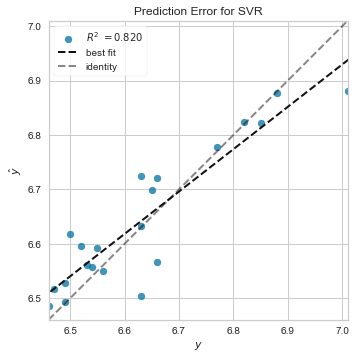

<AxesSubplot:title={'center':'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [16]:
#Plotting the prediction errors and residuals using yellowbrick 
#Plotting the prediction errors 
import yellowbrick
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(LL_svr)
visualizer.fit(X_train , y_train)
visualizer.score(X_test,y_test.values.ravel())
visualizer.poof()

In [18]:
#Testing model evaluation 

#The MAE 
print(mean_absolute_error(y_test , ytest_pred ))

0.047738439236206354


In [19]:
#The MSE 
print(mean_squared_error(y_test , ytest_pred ))

0.003993807795862191


In [20]:
#The RMSE 

print(mean_squared_error(y_test,ytest_pred))

0.003993807795862191


In [21]:
#The EVS 
print(explained_variance_score(y_test,ytest_pred))

0.8248653401071806


In [24]:
#The k-fold CV 
from sklearn.model_selection import cross_val_score

#Training model CV 
score_train = cross_val_score(LL_svr,X_train , y_train , scoring='neg_mean_squared_error' , cv=10)

score_train

C:\Users\ashok\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashok\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashok\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashok\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([-0.00469538, -0.00272535, -0.00327668, -0.00223556, -0.00194831,
       -0.00170892, -0.00132149, -0.00599042, -0.00295256, -0.01033799])

In [25]:
#THe  mean score 
from numpy import absolute
print(np.mean(score_train))

-0.0037192665194314863


In [27]:
#On the testing dataset 
#Testing  model CV 
score_test = cross_val_score(LL_svr,X_test , y_test , scoring='neg_mean_squared_error' , cv=10)

score_test

C:\Users\ashok\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashok\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashok\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashok\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([-0.001036  , -0.00990726, -0.00242845, -0.02295054, -0.00284004,
       -0.00502698, -0.00483298, -0.00165459, -0.01378442, -0.00157535])

In [28]:
#THe  mean score 
from numpy import absolute
print(np.mean(score_test))

-0.006603661355409483


In [30]:
cd Downloads

[WinError 2] The system cannot find the file specified: 'Downloads'
C:\Users\ashok\Downloads\Project


In [31]:
pwd

'C:\\Users\\ashok\\Downloads\\Project'

In [32]:
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Print the parameters,i.e. intercept and slope of the regression line obtained
lr.params

#Performing a summary operation lists out all different parameters of the regression line fitted
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     63.33
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.54e-27
Time:                        02:47:13   Log-Likelihood:                 127.36
No. Observations:                  77   AIC:                            -238.7
Df Residuals:                      69   BIC:                            -220.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.2750      0.245     21.553   